## 🦠 *COVID-19 Hospitalization Rates Analysis*
#### *Dataset: Monthly Rates of Laboratory-Confirmed COVID-19 Hospitalizations*
- ##### *Last Updated: `June 20, 2025`*
- ##### *Data set type - `JSON`*
- ##### *Tools Used - `Pandas`, `Numpy`, `Matplotlib`, `Seaborn`*

### 🧩 *Business Problem*
*Public health agencies need to monitor and analyze `COVID-19 hospitalization trends` over time to guide resource allocation, vaccination strategies, and emergency preparedness. By understanding how hospitalization rates vary across states, age groups, genders, and racial demographics on a monthly basis, decision-makers can respond more effectively to changing pandemic conditions and protect vulnerable populations.*

### *Project Description:*
*This project analyzes a comprehensive real-time dataset containing 41,787 records and 16 features, sourced from the `CDC’s COVID-NET Surveillance System` and provided as a JSON file on Data.gov. Key columns include `State`, `Season`, `AgeCategory_Legend`, `Sex_Label`, `Race_Label`, and `MonthlyRate`, enabling detailed segmentation of COVID-19 hospitalization trends across U.S. demographics and time periods.*

##### *This end-to-end project using Python involves:*
- *Loading and parsing the raw JSON dataset into a structured pandas DataFrame*
- *Using Capstorm project methodology for the various analytical measures*
- *Performing exploratory data analysis (EDA) to understand hospitalization patterns by demographic factors and time*
- *Generating actionable insights to inform public health planning and resource distribution*
- *Showcasing the capability to work with real-time, dynamic data sources in JSON format for health surveillance*
- *This project demonstrates how Python and JSON can be leveraged to transform complex, real-time public health data into clear, data-driven strategies to support pandemic response efforts.*

### *Loading and Parsing the JSON Dataset*

In [1]:
import json

with open('data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

print(type(data))

<class 'dict'>


### *Exploring Top-Level Keys in the JSON Structure*

In [2]:
data.keys()

dict_keys(['meta', 'data'])

### *Previewing the First 5 Records from the Dataset*

In [3]:
data['data'][:5]

[['row-txmy~uvnm~hgum',
  '00000000-0000-0000-FCC3-5FAEF0479661',
  0,
  1750354734,
  None,
  1750354734,
  None,
  '{ }',
  'Utah',
  '2021-22',
  '202111.0',
  '6mo-<12 months',
  'All',
  'All',
  '39.7',
  'Crude Rate'],
 ['row-az6r.etr8.j996',
  '00000000-0000-0000-2800-ADF2340F9A42',
  0,
  1750354734,
  None,
  1750354734,
  None,
  '{ }',
  'Utah',
  '2021-22',
  '202110.0',
  '6mo-<12 months',
  'All',
  'All',
  '0.0',
  'Crude Rate'],
 ['row-w2bq-snqf_bwnd',
  '00000000-0000-0000-3F5F-352CE5C1E08A',
  0,
  1750354734,
  None,
  1750354734,
  None,
  '{ }',
  'Utah',
  '2021-22',
  '202202.0',
  '6mo-<12 months',
  'All',
  'All',
  '53.0',
  'Crude Rate'],
 ['row-hq2f.655s~n794',
  '00000000-0000-0000-8F4E-6F6C669F4BFE',
  0,
  1750354734,
  None,
  1750354734,
  None,
  '{ }',
  'Utah',
  '2021-22',
  '202206.0',
  '6mo-<12 months',
  'All',
  'All',
  '74.0',
  'Crude Rate'],
 ['row-sxbb-4qr7_5y6j',
  '00000000-0000-0000-47FB-E9B3523593B4',
  0,
  1750354734,
  None,
  17

### *Extracting Column Names from the Metadata*

In [4]:
columns = [col['name'] for col in data['meta']['view']['columns']]
print(columns)

['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'State', 'Season', '_YearMonth', 'AgeCategory_Legend', 'Sex_Label', 'Race_Label', 'MonthlyRate', 'Type']


### *`Environmental Setup`*
#### *Importing Essential Libraries*

In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.DataFrame(data['data'], columns=columns)
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,State,Season,_YearMonth,AgeCategory_Legend,Sex_Label,Race_Label,MonthlyRate,Type
0,row-txmy~uvnm~hgum,00000000-0000-0000-FCC3-5FAEF0479661,0,1750354734,None,1750354734,None,{ },Utah,2021-22,202111.0,6mo-<12 months,All,All,39.7,Crude Rate
1,row-az6r.etr8.j996,00000000-0000-0000-2800-ADF2340F9A42,0,1750354734,None,1750354734,None,{ },Utah,2021-22,202110.0,6mo-<12 months,All,All,0.0,Crude Rate
2,row-w2bq-snqf_bwnd,00000000-0000-0000-3F5F-352CE5C1E08A,0,1750354734,None,1750354734,None,{ },Utah,2021-22,202202.0,6mo-<12 months,All,All,53.0,Crude Rate
3,row-hq2f.655s~n794,00000000-0000-0000-8F4E-6F6C669F4BFE,0,1750354734,None,1750354734,None,{ },Utah,2021-22,202206.0,6mo-<12 months,All,All,74.0,Crude Rate
4,row-sxbb-4qr7_5y6j,00000000-0000-0000-47FB-E9B3523593B4,0,1750354734,None,1750354734,None,{ },Utah,2021-22,202208.0,6mo-<12 months,All,All,29.6,Crude Rate


### *`Data Understanding`*
##### *Check for the following :-*
- *Rows and Columns*
- *Name of Columns*
- *Data types of each column*
- *First 5 rows of the dataset*
- *Check for the missingvalues*

In [50]:
# To check for the number of rows and columns in the JSON file
df.shape

(41787, 16)

##### *`Rows`* - 41787
##### *`Columns`* - 16

In [51]:
# To check for the name of columns in the JSON file
df.columns.tolist()

['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'State',
 'Season',
 '_YearMonth',
 'AgeCategory_Legend',
 'Sex_Label',
 'Race_Label',
 'MonthlyRate',
 'Type']

In [52]:
# To check for the Data type for each columns in the JSON file
df.dtypes

sid                   object
id                    object
position               int64
created_at             int64
created_meta          object
updated_at             int64
updated_meta          object
meta                  object
State                 object
Season                object
_YearMonth            object
AgeCategory_Legend    object
Sex_Label             object
Race_Label            object
MonthlyRate           object
Type                  object
dtype: object

In [49]:
# To check for the first 3 rows along with the columns of the JSON file
df.head(3)

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,State,Season,_YearMonth,AgeCategory_Legend,Sex_Label,Race_Label,MonthlyRate,Type
0,row-txmy~uvnm~hgum,00000000-0000-0000-FCC3-5FAEF0479661,0,1750354734,None,1750354734,None,{ },Utah,2021-22,202111.0,6mo-<12 months,All,All,39.7,Crude Rate
1,row-az6r.etr8.j996,00000000-0000-0000-2800-ADF2340F9A42,0,1750354734,None,1750354734,None,{ },Utah,2021-22,202110.0,6mo-<12 months,All,All,0.0,Crude Rate
2,row-w2bq-snqf_bwnd,00000000-0000-0000-3F5F-352CE5C1E08A,0,1750354734,None,1750354734,None,{ },Utah,2021-22,202202.0,6mo-<12 months,All,All,53.0,Crude Rate


In [53]:
# To check for the missing values in the JSON file
df.isna().sum()

sid                       0
id                        0
position                  0
created_at                0
created_meta          41787
updated_at                0
updated_meta          41787
meta                      0
State                     0
Season                    0
_YearMonth                0
AgeCategory_Legend        0
Sex_Label                 0
Race_Label                0
MonthlyRate             900
Type                      0
dtype: int64

### *`Data Exploration`*

####  *`sid` – Data Exploration Insight* 
- *Data Type is object*
- *No missing values in the column*
- *All unique values(41787)*
- *Not a nexessary column as per the data Analysis*
- *Drop the column*

In [12]:
# Data type
print("Data type:", df['sid'].dtype)

Data type: object


In [13]:
# Null values
print("Missing values:", df['sid'].isna().sum())

Missing values: 0


In [14]:
# Unique count
print("Unique values:", df['sid'].nunique())

Unique values: 41787


###  *`id` – Data Exploration Insight*
- *Data Type is object*
- *No missing values*
- *All unique values (41787)*
- *Not a necessary column for DataAnalysis, Drop the column*

In [15]:
# Data type
print("Data type:", df['id'].dtype)

Data type: object


In [16]:
# Null values
print("Missing values:", df['id'].isna().sum())

Missing values: 0


In [17]:
# Unique count
print("Unique values:", df['id'].nunique())

Unique values: 41787


###  *`position` – Data Exploration Insight*
- *Data Type is int*
- *No missing values*
- *All unique values(41787)*
- *All are 0, ie empty column*
- *No need in the data set so we can drop the columns*

In [18]:
# Data type
print("Data type:", df['position'].dtype)

Data type: int64


In [19]:
# Null values
print("Missing values:", df['position'].isna().sum())

Missing values: 0


In [20]:
# Unique count
print("Unique values:", df['position'].nunique())

Unique values: 1


In [21]:
# Value counts
print("Distribution:", df['position'].value_counts())

Distribution: position
0    41787
Name: count, dtype: int64


###  *`created_at` – Data Exploration Insight*
- *Data Type is int*
- *No missing values*
- *1 Unique value (1750354734)*
- *Not a necessary column for the Analysis so Drop the column*

In [22]:
# Data type
print("Data type:", df['created_at'].dtype)

Data type: int64


In [23]:
# Null values
print("Missing values:", df['created_at'].isna().sum())

Missing values: 0


In [24]:
# Unique count
print("Unique Values:", df['created_at'].nunique())

Unique Values: 1


In [25]:
# Value counts
print("Distribution:", df['created_at'].value_counts())

Distribution: created_at
1750354734    41787
Name: count, dtype: int64


###  *`updated_at` – Data Exploration Insight*
- *Data type is int*
- *No Missing values*
- *All unique values (1750354734)*
- *Not a necessary column so we can drop this column*

In [26]:
# Data type
print("Data type:", df['updated_at'].dtype)

Data type: int64


In [27]:
# Null values
print("Missing values:", df['updated_at'].isna().sum())

Missing values: 0


In [28]:
# Unique count
print("Unique Values:", df['updated_at'].nunique())

Unique Values: 1


In [29]:
# Value counts
print("Distribution:", df['updated_at'].value_counts())

Distribution: updated_at
1750354734    41787
Name: count, dtype: int64


###  *`updated_meta` – Data Exploration Insight*
- *Data Type is object*
- *All missing values in the columns*
- *0 Unique values in the column*
- *All missing values so drop the column*

In [30]:
# Data type
print("Data type:", df['updated_meta'].dtype)

Data type: object


In [31]:
# Null values
print("Missing values:", df['updated_meta'].isna().sum())

Missing values: 41787


In [32]:
# Unique count
print("Unique Values:", df['updated_meta'].nunique())

Unique Values: 0


###  *`meta` – Data Exploration Insight*
- *Data type is object*
- *O missing values*
- *No need for the column as it has {} as Special characters*
- *We can drop as this is a usless colummn in Analysis*

In [36]:
# Data type
print("Data type:", df['meta'].dtype)

Data type: object


In [37]:
# Null values
print("Missing Values:", df['meta'].isna().sum())

Missing Values: 0


In [38]:
# Unique count
print("Unique Values:", df['meta'].nunique())

Unique Values: 1


In [39]:
# Value counts
print("Distribution:", df['meta'].value_counts())

Distribution: meta
{ }    41787
Name: count, dtype: int64


###  *`State` – Data Exploration Insight*
- *Data type is Object*
- *No missing values in the column*
- *16 Unique states*
- *top 5 states are - `COVID-NET`, `Utah`, `Tennessee`, `Tennessee`, `Oregon`*
- *Lowest 5 states are - `North Carolina`, `Iowa`, `Ohio`, `California`, `Colorado`*
- *The value `COVID-NET` in the state column refers to a `CDC surveillance network`, not an actual U.S. state. It represents aggregated data from all participating regions. For state-level analysis, this value is filtered out to avoid distortion.*

In [40]:
# Data type
print("Data type:", df['State'].dtype)

Data type: object


In [41]:
# Null values
print("Missing Values:", df['State'].isna().sum())

Missing Values: 0


In [42]:
# Unique count
print("Unique Values:", df['State'].nunique())

Unique Values: 16


In [44]:
# Top 5 most common State
print("Top 5 States:")
print(df['State'].value_counts().head(5))

Top 5 States:
State
COVID-NET    3136
Utah         2816
Tennessee    2816
Oregon       2816
New York     2816
Name: count, dtype: int64


In [45]:
# Lowe 5 most common State
print("Low 5 States:")
print(df['State'].value_counts().tail(5))

Low 5 States:
State
Colorado          2816
California        2816
Ohio              2483
Iowa              1595
North Carolina     781
Name: count, dtype: int64


###  *`Season` – Data Exploration Insight*
- *Data Type is Object*
- *No MIsiing values*
- *All 6 unique Seasons (years)*
- *Records are from 2019-2025*
- *YEar wise distribution patterns like `2019-20`, `2020-21`, `2021-22`, `2022-23`, `2023-24`, `2024-25`*
- *This column is valuable for time series analysis, seasonal trend identification, and year-wise comparison of hospitalization rates.*
- *Need to seperate them on seperate yearwise for beter analysis*

In [54]:
# Data type
print("Data type:", df['Season'].dtype)

Data type: object


In [55]:
# Null values
print("Missing Values:", df['Season'].isna().sum())

Missing Values: 0


In [56]:
# Unique count
print("Unique Values:", df['Season'].nunique())

Unique Values: 6


In [57]:
# Value counts
print("Distribution:", df['Season'].value_counts())

Distribution: Season
2021-22    8064
2020-21    8064
2022-23    7620
2023-24    7620
2024-25    5715
2019-20    4704
Name: count, dtype: int64


###  *`_YearMonth` – Data Exploration Insight*
- *Data Type is Object*
- *No missing values in the colummns*
- *Year and month combined as `YYYYMM.0`*
- *Fairly consistent per month (mostly around 635–672 records)*
- *Appears to cover ~5+ years of monthly data from mid-2020 to early 2025*
- *Data type needs to be converted*
- *Name needs to be changed*
- *Year and month nees to be seperated*

In [58]:
# Data type
print("Data type:", df['_YearMonth'].dtype)

Data type: object


In [59]:
# Null values
print("Missing values:", df['_YearMonth'].isna().sum())

Missing values: 0


In [60]:
# Unique count
print("Unique Values:", df['_YearMonth'].nunique())

Unique Values: 64


In [61]:
# Value counts
print("Distribution:", df['_YearMonth'].value_counts())

Distribution: _YearMonth
202111.0    672
202107.0    672
202008.0    672
202006.0    672
202007.0    672
           ... 
202312.0    635
202402.0    635
202403.0    635
202404.0    635
202304.0    635
Name: count, Length: 64, dtype: int64


###  *`AgeCategory_Legend` – Data Exploration Insight*
- *Data type is Object*
- *No Missing values*
- *23 distinct age categories*
- *Indicates age-specific granularity suitable for segmentation*

In [62]:
# Data type
print("Data type:", df['AgeCategory_Legend'].dtype)

Data type: object


In [63]:
# Null values
print("Missing Values:", df['AgeCategory_Legend'].isna().sum())

Missing Values: 0


In [64]:
# Unique count
print("Unique Values:", df['AgeCategory_Legend'].nunique())

Unique Values: 23


In [65]:
# Value counts
print("Distribution:", df['AgeCategory_Legend'].value_counts())

Distribution: AgeCategory_Legend
0-17 years (Children)    8095
All                      7736
≥18 years (Adults)       7416
75-84 years               927
30-39 years               927
0-4 years                 927
50-64 years               927
≥85 years                 927
0-<1 year                 927
0-<6 months               927
65-74 years               927
2-4 years                 927
6mo-<12 months            927
18-49 years               927
12-17 years               927
5-17 years                927
18-29 years               927
1-<2 years                927
≥75 years                 927
1-4 years                 927
≥65 years                 927
5-11 years                927
40-49 years               927
Name: count, dtype: int64


###  *`Sex_Label` – Data Exploration Insight*
- *Data type is Object*
- *No missing values*
- *3Unique values in the column*
- *Male and Female are mostly equal*

In [66]:
# Data type
print("Data type:", df['Sex_Label'].dtype)

Data type: object


In [67]:
# Null values
print("Missing Values:", df['Sex_Label'].isna().sum())

Missing Values: 0


In [68]:
# Unique count
print("Unique Values:", df['Sex_Label'].nunique())

Unique Values: 3


In [69]:
# Value counts
print("Values Distribution:", df['Sex_Label'].value_counts())

Values Distribution: Sex_Label
All       36031
Female     2878
Male       2878
Name: count, dtype: int64


###  *`Race_Label` – Data Exploration Insight*
- *Data type is object*
- *No missing values in the column*
- *No of unique values are 6*
- *The `'All'` category appears in the majority of records and likely represents aggregated values across all racial groups*

In [70]:
# Data type
print("Data type:", df['Race_Label'].dtype)

Data type: object


In [71]:
# Null values
print("Missing values:", df['Race_Label'].isna().sum())

Missing values: 0


In [72]:
# Unique count
print("Unique Values:", df['Race_Label'].nunique())

Unique Values: 6


In [73]:
# Value counts
print("Distribution:", df['Race_Label'].value_counts())

Distribution: Race_Label
All                    27077
Hispanic                2942
A/PI, non-Hispanic      2942
AI/AN, non-Hispanic     2942
Black, non-Hispanic     2942
White, non-Hispanic     2942
Name: count, dtype: int64


###  *`MonthlyRate` – Data Exploration Insight*
- *Data Type is Object*
- *Missing Values are 900*
- *Unique values are 2626*
- *Skewness 5.4*
- *Number of outliers: 4218*

In [74]:
# Data type
print("Data type:", df['MonthlyRate'].dtype)

Data type: object


In [75]:
# Null values
print("Missing Values:", df['MonthlyRate'].isna().sum())

Missing Values: 900


In [76]:
# Unique count
print("Unique Values:", df['MonthlyRate'].nunique())

Unique Values: 2626


In [77]:
# Skewness 
print("Skewness",df['MonthlyRate'].skew())

Skewness 5.498793388271701


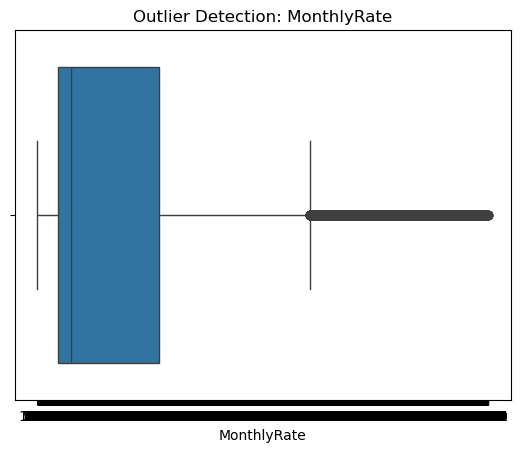

In [78]:
# Outliers Detection using Boxplot
sns.boxplot(x=df['MonthlyRate'])
plt.title('Outlier Detection: MonthlyRate')
plt.show()

In [79]:
# Convering to numeric so that we can find outliers for IQR methord
df['MonthlyRate'] = pd.to_numeric(df['MonthlyRate'], errors='coerce')

In [80]:
# Detection of Outliers by IQR methord
Q1 = df['MonthlyRate'].quantile(0.25)
Q3 = df['MonthlyRate'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['MonthlyRate'] < Q1 - 1.5*IQR) | (df['MonthlyRate'] > Q3 + 1.5*IQR)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 4218


###  *`Type` – Data Exploration Insight*
- *Data Type is Object*
- *No missing value*
- *2 Unique values*
- *`Crude Rate`: 41,467 records*
- *`Age adjusted Rate`: 320 records*

In [81]:
# Data type
print("Data type:", df['Type'].dtype)

Data type: object


In [82]:
# Null values
print("Missing Values:", df['Type'].isna().sum())

Missing Values: 0


In [83]:
# Unique count
print("Unique Values:", df['Type'].nunique())

Unique Values: 2


In [84]:
# Value counts
print("Distribution:", df['Type'].value_counts())

Distribution: Type
Crude Rate           41467
Age adjusted Rate      320
Name: count, dtype: int64


### *Data Cleaning*

### *Dropping the usless Columns*

In [85]:
# List of columns to drop based on Business Problem
columns_to_drop = [
    'sid',
    'id',
    'position',
    'created_at',
    'updated_at',
    'updated_meta',
    'meta'
]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Confirm the new shape and columns
print("Shape after dropping:", df.shape)
print("Remaining columns:", df.columns.tolist())

Shape after dropping: (41787, 9)
Remaining columns: ['created_meta', 'State', 'Season', '_YearMonth', 'AgeCategory_Legend', 'Sex_Label', 'Race_Label', 'MonthlyRate', 'Type']


### *Renaming the columns*

In [86]:
# Rename mapping dictionary
rename_dict = {
    'created_meta': 'CreatedMeta',
    'State': 'State',
    'Season': 'Season',
    '_YearMonth': 'YearMonth',
    'AgeCategory_Legend': 'AgeCategory',
    'Sex_Label': 'Gender',
    'Race_Label': 'Race',
    'MonthlyRate': 'MonthlyRate',
    'Type': 'RateType'
}

# Apply renaming
df.rename(columns=rename_dict, inplace=True)

# Confirm new column names
print("Renamed columns:", df.columns.tolist())

Renamed columns: ['CreatedMeta', 'State', 'Season', 'YearMonth', 'AgeCategory', 'Gender', 'Race', 'MonthlyRate', 'RateType']


### *Data Types corrections*

In [87]:
# Convert YearMonth to datetime
df['YearMonth'] = pd.to_datetime(df['YearMonth'].astype(float).astype(int).astype(str), format='%Y%m')

# Convert MonthlyRate to float (handle errors if any)
df['MonthlyRate'] = pd.to_numeric(df['MonthlyRate'], errors='coerce')

# Convert categorical columns to 'category' dtype for efficiency
categorical_cols = ['State', 'Season', 'AgeCategory', 'Gender', 'Race', 'RateType']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Confirm changes
print(df.dtypes)

CreatedMeta            object
State                category
Season               category
YearMonth      datetime64[ns]
AgeCategory          category
Gender               category
Race                 category
MonthlyRate           float64
RateType             category
dtype: object


### *Handle with the missing values*

In [88]:
print("Total Missing Values", df.isna().sum())

Total Missing Values CreatedMeta    41787
State              0
Season             0
YearMonth          0
AgeCategory        0
Gender             0
Race               0
MonthlyRate      900
RateType           0
dtype: int64


In [89]:
# Since CreatedMeta have more missing values and its not a necessary column for analyis DROP this column
df.drop(columns=['CreatedMeta'], inplace=True)

In [90]:
df = df.dropna(subset=['MonthlyRate'])

In [91]:
print("Total Missing Values", df.isna().sum())

Total Missing Values State          0
Season         0
YearMonth      0
AgeCategory    0
Gender         0
Race           0
MonthlyRate    0
RateType       0
dtype: int64


### *Dealing with the ouliers*

In [93]:
# To check for the outliers in the Monthly Rate column
Q1 = df['MonthlyRate'].quantile(0.25)
Q3 = df['MonthlyRate'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['MonthlyRate'] < Q1 - 1.5*IQR) | (df['MonthlyRate'] > Q3 + 1.5*IQR)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 4218


#### *Flag Outliers First*

In [94]:
Q1 = df['MonthlyRate'].quantile(0.25)
Q3 = df['MonthlyRate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Now flag the outliers
df['MonthlyRate_outlier'] = ((df['MonthlyRate'] < lower_bound) | (df['MonthlyRate'] > upper_bound)).astype(int)

# Check how many outliers were flagged
print(f"Outliers flagged: {df['MonthlyRate_outlier'].sum()}")

Outliers flagged: 4218


#### *Dealing with the outliers*
- *Keep your original `MonthlyRate` column intact (for reference)*
- *Create a log-transformed version — to reduce skewness and lessen outlier impact*
- *Create a capped version — to limit extreme values without dropping data*

In [95]:
# Log transform (log1p handles zeros safely)
df['MonthlyRate_log'] = np.log1p(df['MonthlyRate'])

# Cap outliers based on IQR bounds
df['MonthlyRate_capped'] = df['MonthlyRate'].clip(lower=lower_bound, upper=upper_bound)

# Check new columns
print(df[['MonthlyRate', 'MonthlyRate_log', 'MonthlyRate_capped']].head())

   MonthlyRate  MonthlyRate_log  MonthlyRate_capped
0         39.7         3.706228                39.7
1          0.0         0.000000                 0.0
2         53.0         3.988984                53.0
3         74.0         4.317488                74.0
4         29.6         3.421000                29.6


### *Check for the duplicates in the Data*

In [96]:
# Count total duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### *Standarizing the colummns*

In [97]:
# Clean column names: strip spaces, lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check the cleaned columns
print(df.columns.tolist())

['state', 'season', 'yearmonth', 'agecategory', 'gender', 'race', 'monthlyrate', 'ratetype', 'monthlyrate_outlier', 'monthlyrate_log', 'monthlyrate_capped']


### *Extracting Season Start Year for Year-wise Analysis*

In [98]:
df['season_start_year'] = df['season'].str[:4].astype(int)

In [99]:
df['season_start_year'].value_counts()

season_start_year
2020    7980
2021    7804
2022    7452
2023    7452
2024    5544
2019    4655
Name: count, dtype: int64

In [101]:
# Final columns after the Data Cleaning
df.columns

Index(['state', 'season', 'yearmonth', 'agecategory', 'gender', 'race',
       'monthlyrate', 'ratetype', 'monthlyrate_outlier', 'monthlyrate_log',
       'monthlyrate_capped', 'season_start_year'],
      dtype='object')

### *Data Analysis*
#### *Formation Of EDA questiosn for better insights*

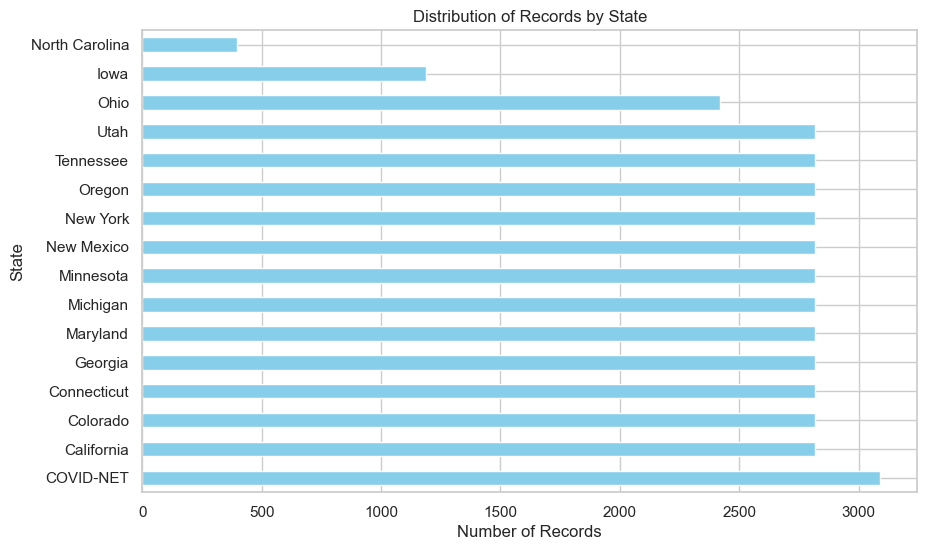

In [164]:
# 1. EDA Question: What is the distribution of hospitalization records across different states?
df['state'].value_counts().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Distribution of Records by State")
plt.xlabel("Number of Records")
plt.ylabel("State")
plt.show()

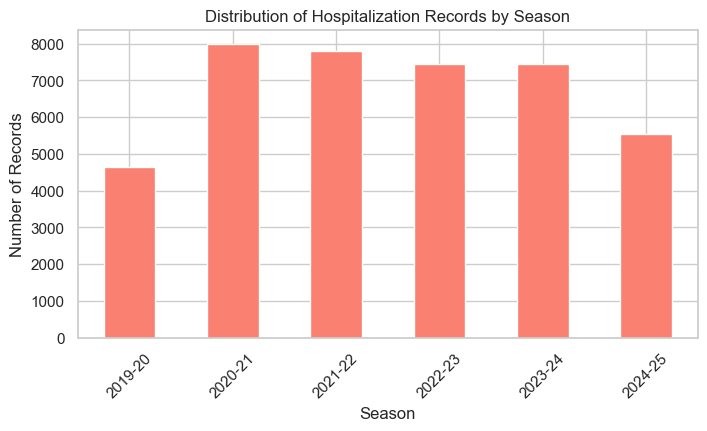

In [165]:
#2. EDA Question: How is the data distributed across different seasons?
df['season'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4), color='salmon')
plt.title("Distribution of Hospitalization Records by Season")
plt.xlabel("Season")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.show()

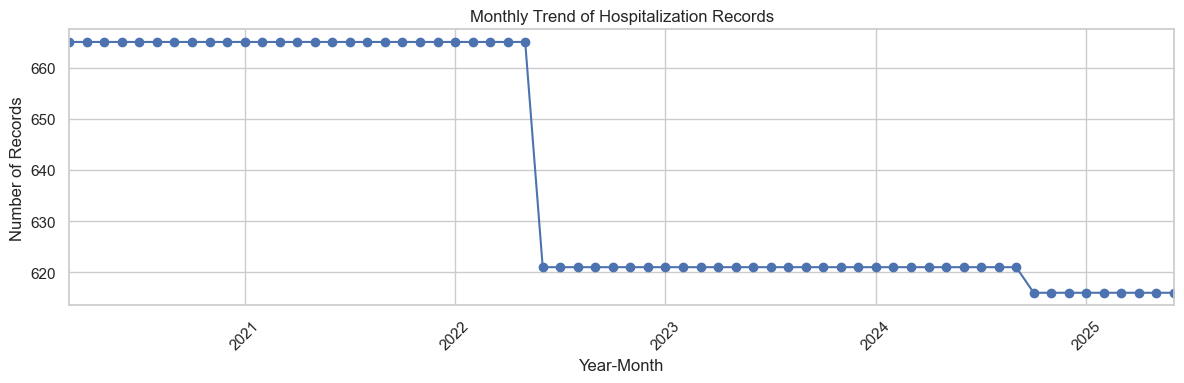

In [105]:
# 3. EDA Question: How many records are there for each year-month combination?
df['yearmonth'].value_counts().sort_index().plot(kind='line', figsize=(12, 4), marker='o')
plt.title("Monthly Trend of Hospitalization Records")
plt.xlabel("Year-Month")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

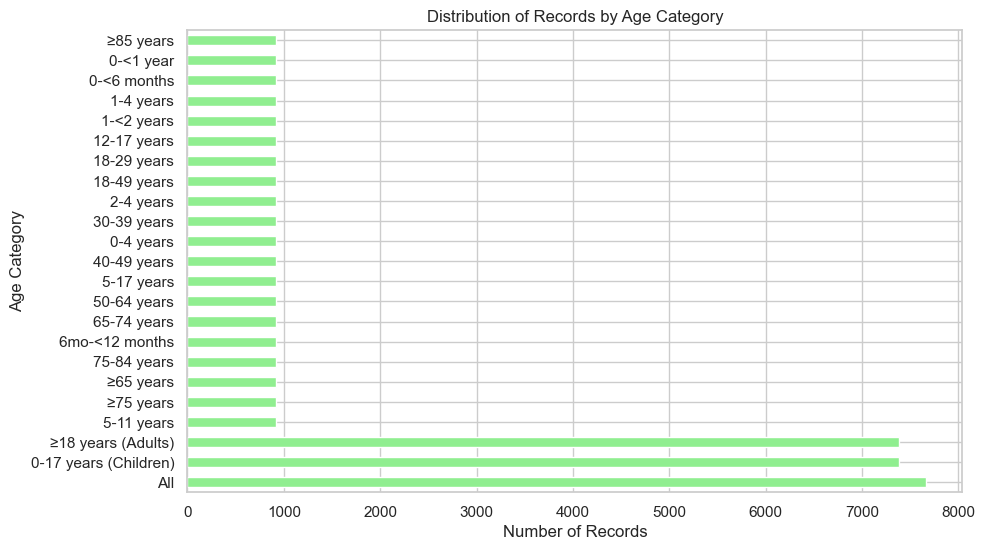

In [166]:
#4. EDA Question: What is the frequency of each age category in the data?
df['agecategory'].value_counts().plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title("Distribution of Records by Age Category")
plt.xlabel("Number of Records")
plt.ylabel("Age Category")
plt.show()

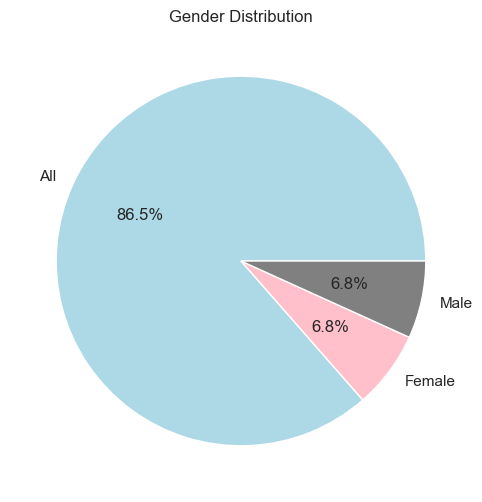

In [107]:
# 5. EDA Question: What is the gender distribution in the data?
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['lightblue', 'pink', 'grey'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

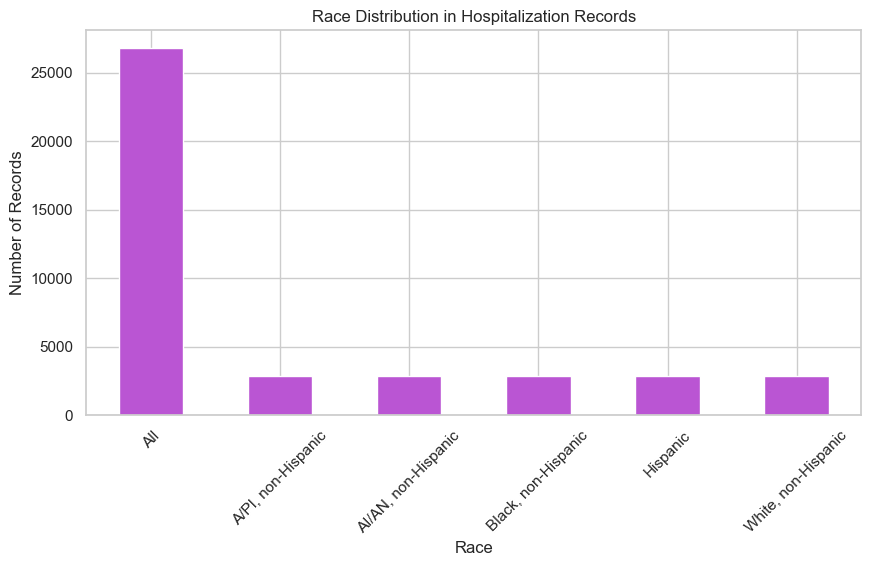

In [167]:
# 6. EDA Question: What is the racial composition in hospitalization records?
df['race'].value_counts().plot(kind='bar', figsize=(10, 5), color='mediumorchid')
plt.title("Race Distribution in Hospitalization Records")
plt.xlabel("Race")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.show()

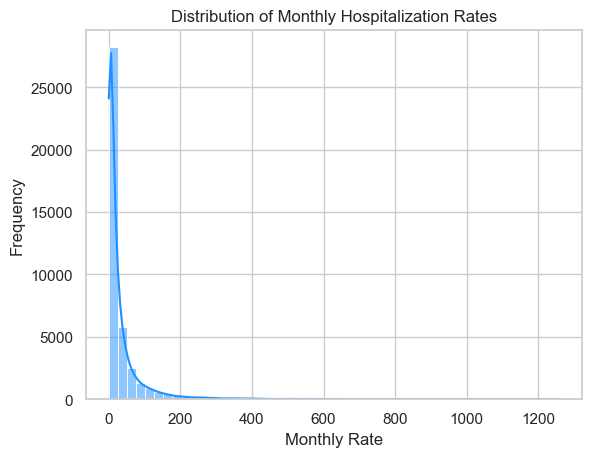

In [168]:
# 7. EDA Question: What is the distribution of monthly hospitalization rates?
sns.histplot(df['monthlyrate'], bins=50, kde=True, color='dodgerblue')
plt.title("Distribution of Monthly Hospitalization Rates")
plt.xlabel("Monthly Rate")
plt.ylabel("Frequency")
plt.show()

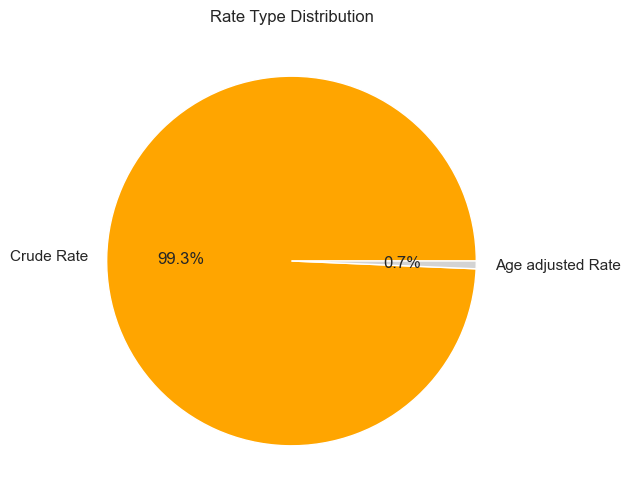

In [169]:
# 8. EDA Question: How many records are categorized by rate type?
df['ratetype'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['orange', 'lightgray'])
plt.title("Rate Type Distribution")
plt.ylabel("")
plt.show()

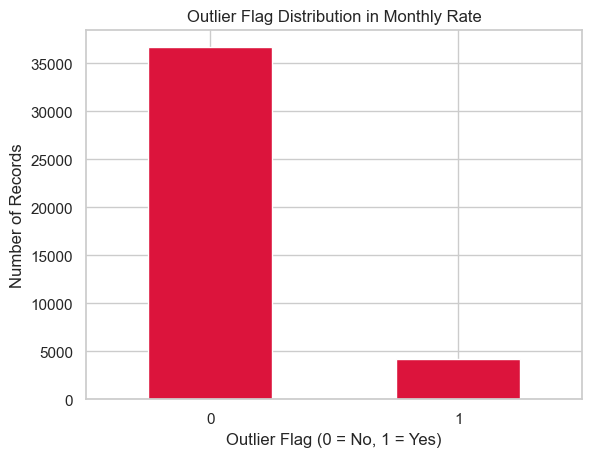

In [170]:
# 9. EDA Question: How many records are flagged as outliers in hospitalization rates?
df['monthlyrate_outlier'].value_counts().plot(kind='bar', color='crimson')
plt.title("Outlier Flag Distribution in Monthly Rate")
plt.xlabel("Outlier Flag (0 = No, 1 = Yes)")
plt.ylabel("Number of Records")
plt.xticks(rotation=0)
plt.show()

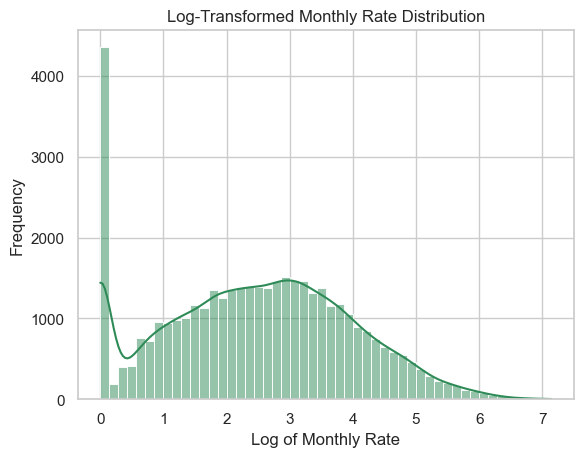

In [171]:
# 10. EDA Question: What is the distribution of log-transformed hospitalization rates?
sns.histplot(df['monthlyrate_log'], bins=50, kde=True, color='seagreen')
plt.title("Log-Transformed Monthly Rate Distribution")
plt.xlabel("Log of Monthly Rate")
plt.ylabel("Frequency")
plt.show()

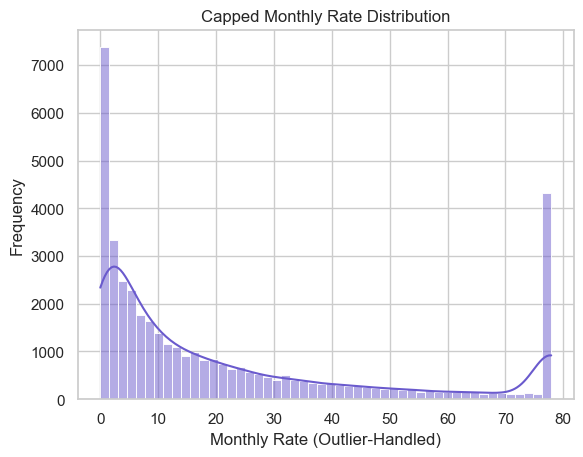

In [172]:
# 11. EDA Question: What is the distribution of capped monthly rates?
sns.histplot(df['monthlyrate_capped'], bins=50, kde=True, color='slateblue')
plt.title("Capped Monthly Rate Distribution")
plt.xlabel("Monthly Rate (Outlier-Handled)")
plt.ylabel("Frequency")
plt.show()

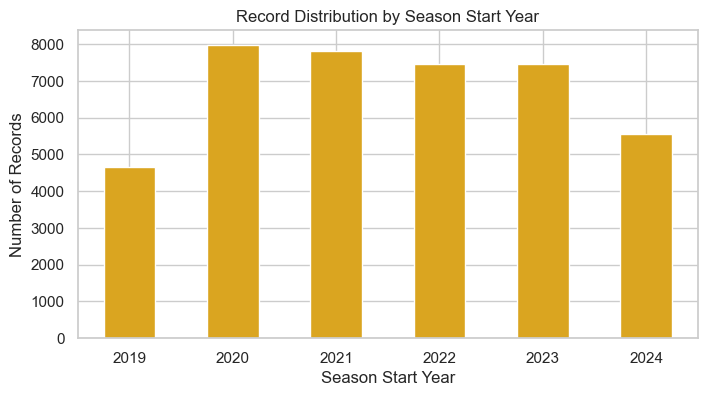

In [173]:
# 12. EDA Question: How are records distributed by the starting year of the season?
df['season_start_year'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4), color='goldenrod')
plt.title("Record Distribution by Season Start Year")
plt.xlabel("Season Start Year")
plt.ylabel("Number of Records")
plt.xticks(rotation=0)
plt.show()

### *Bivariate Analysis*

In [174]:
# Filter out aggregated “All” and the COVID-NET summary
df_sub = df[(df['gender'].isin(['Male','Female'])) & (df['state']!='COVID-NET')]

# Compute average capped rate by month & gender
gender_month = (
    df_sub
    .groupby(['yearmonth','gender'])['monthlyrate_capped']
    .mean()
    .unstack('gender')
)

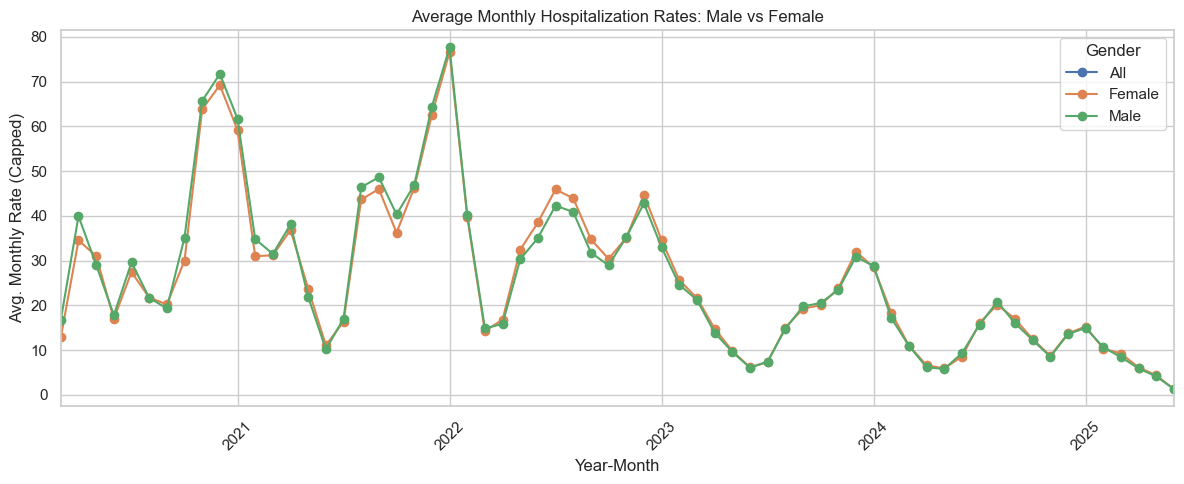

In [175]:
# 1. How do average monthly hospitalization rates compare between males and females over time?
# Filter relevant data
df_gender_time = df[(df['gender'].isin(['Male', 'Female'])) & 
                    (df['agecategory'] == 'All') &
                    (df['race'] == 'All') &
                    (df['state'] != 'COVID-NET')]

# Group and pivot
gender_month = df_gender_time.groupby(['yearmonth', 'gender'])['monthlyrate_capped'].mean().unstack()

# Plot
gender_month.plot(kind='line', figsize=(12,5), marker='o')
plt.title("Average Monthly Hospitalization Rates: Male vs Female")
plt.xlabel("Year-Month")
plt.ylabel("Avg. Monthly Rate (Capped)")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

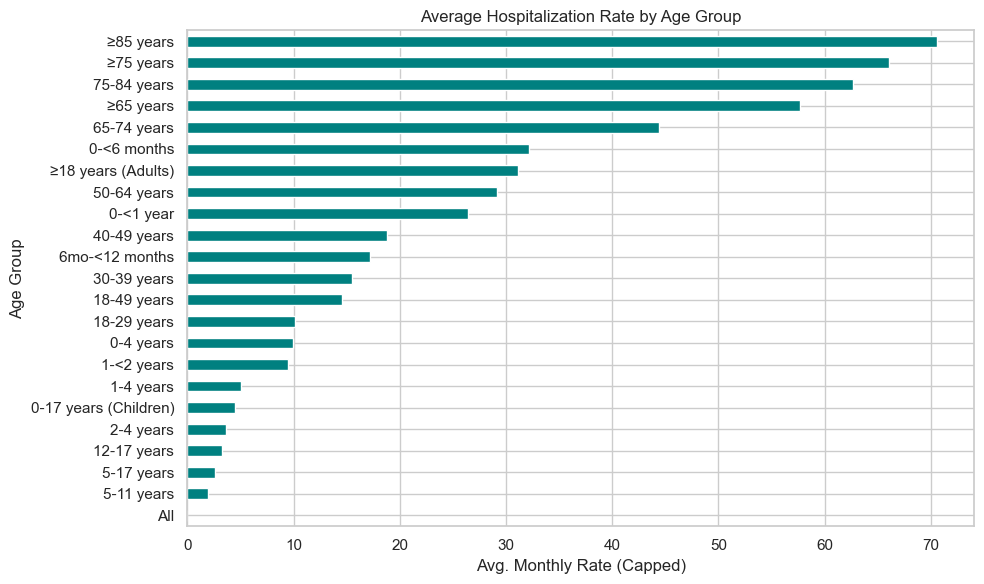

In [176]:
# 2. Which age groups have the highest average hospitalization rates?

# Filter relevant data
df_age = df[(df['agecategory'] != 'All') &
            (df['gender'] == 'All') &
            (df['race'] == 'All') &
            (df['state'] != 'COVID-NET')]

# Calculate average rate by age category
age_avg = df_age.groupby('agecategory')['monthlyrate_capped'].mean().sort_values(ascending=False)

# Plot
age_avg.plot(kind='barh', figsize=(10,6), color='teal')
plt.title("Average Hospitalization Rate by Age Group")
plt.xlabel("Avg. Monthly Rate (Capped)")
plt.ylabel("Age Group")
plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
plt.show()

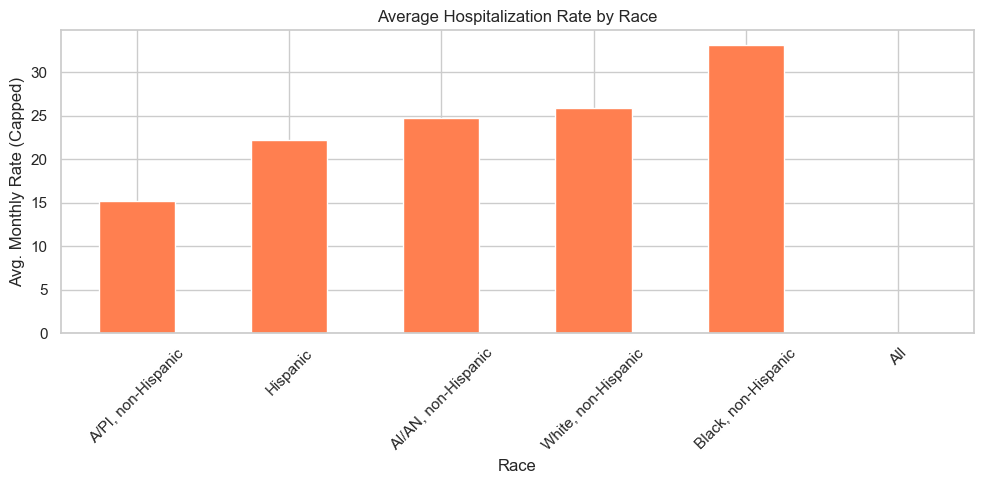

In [177]:
# 3. How does hospitalization rate differ across racial groups?

# Filter relevant data
df_race = df[(df['race'] != 'All') &
             (df['gender'] == 'All') &
             (df['agecategory'] == 'All') &
             (df['state'] != 'COVID-NET')]

# Average rate by race
race_avg = df_race.groupby('race')['monthlyrate_capped'].mean().sort_values()

# Plot
race_avg.plot(kind='bar', figsize=(10,5), color='coral')
plt.title("Average Hospitalization Rate by Race")
plt.xlabel("Race")
plt.ylabel("Avg. Monthly Rate (Capped)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


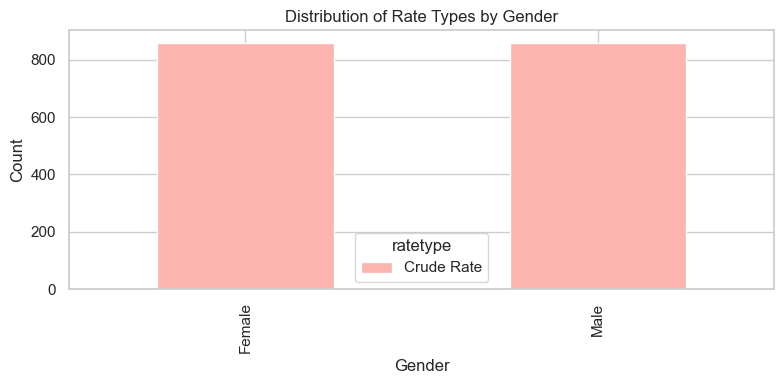

In [178]:
# 4. What’s the distribution of rate types (crude vs. age-adjusted) by gender?

# Filter relevant data
df_rate_gender = df[(df['gender'].isin(['Male', 'Female'])) &
                    (df['agecategory'] == 'All') &
                    (df['race'] == 'All') &
                    (df['state'] != 'COVID-NET')]

# Crosstab count of rate types by gender
rate_type_gender = pd.crosstab(df_rate_gender['gender'], df_rate_gender['ratetype'])

# Plot stacked bar
rate_type_gender.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Pastel1')
plt.title("Distribution of Rate Types by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


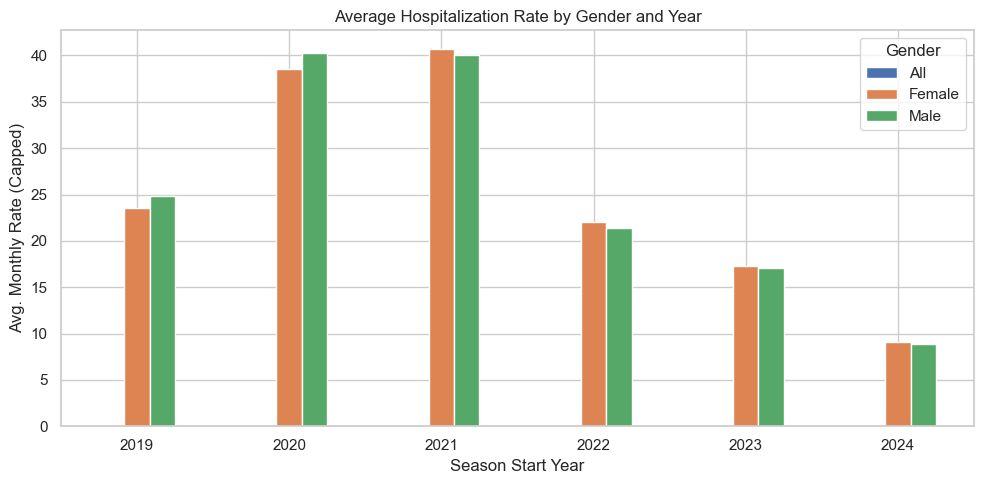

In [179]:
# 5. How have average hospitalization rates changed year-to-year, by gender?

# Filter relevant data
df_year_gender = df[(df['gender'].isin(['Male', 'Female'])) &
                    (df['agecategory'] == 'All') &
                    (df['race'] == 'All') &
                    (df['state'] != 'COVID-NET')]

# Group by year and gender
year_gender_avg = df_year_gender.groupby(['season_start_year', 'gender'])['monthlyrate_capped'].mean().unstack()

# Plot
year_gender_avg.plot(kind='bar', figsize=(10,5))
plt.title("Average Hospitalization Rate by Gender and Year")
plt.xlabel("Season Start Year")
plt.ylabel("Avg. Monthly Rate (Capped)")
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### *Multivariate Analysis*

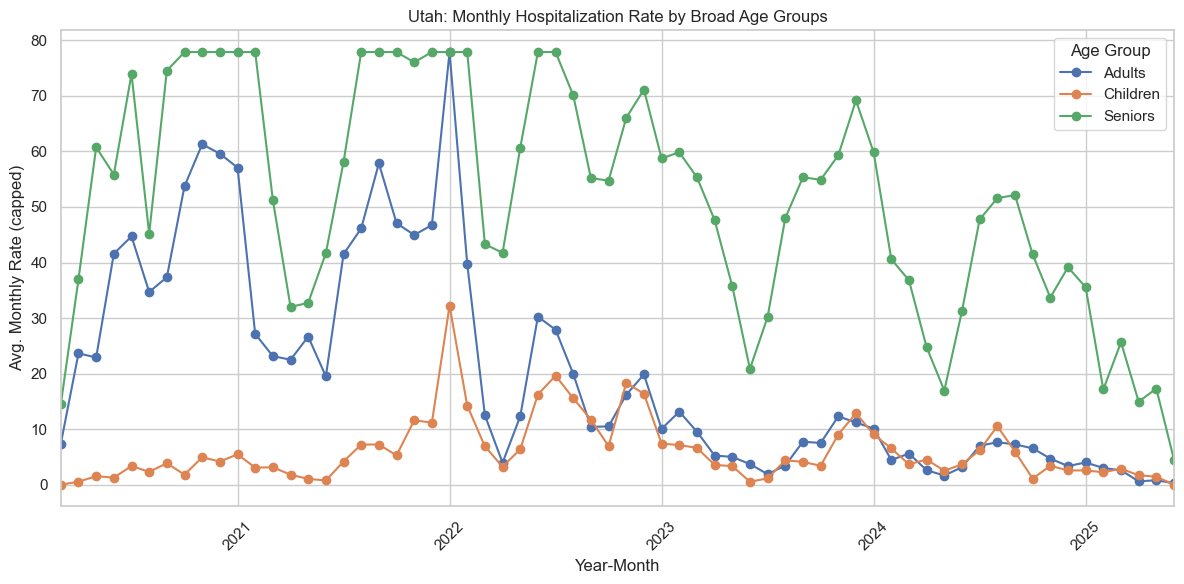

In [180]:
# 1.How do monthly hospitalization rates in Utah vary across broad age groups (Children, Adults, Seniors) over time?

# Define broad age groups mapping
mapping = {
    '0-17 years (Children)': 'Children',
    '0-4 years': 'Children',
    '5-17 years': 'Children',
    '18-49 years': 'Adults',
    '50-64 years': 'Adults',
    '65-74 years': 'Seniors',
    '≥75 years': 'Seniors',
    # add others to appropriate group if needed
}

# Map agecategory to broad groups, fill missing with 'Others'
df['agegroup_broad'] = df['agecategory'].map(mapping).fillna('Others')

# Filter for Utah and relevant broad groups
df_sub = df[
    (df['gender'] == 'All') &
    (df['race'] == 'All') &
    (df['state'] == 'Utah') &
    (df['agegroup_broad'].isin(['Children', 'Adults', 'Seniors']))
]

# Pivot with broad age groups
pivot_broad = (
    df_sub
    .groupby(['yearmonth', 'agegroup_broad'])['monthlyrate_capped']
    .mean()
    .unstack('agegroup_broad')
)

# Plot
pivot_broad.plot(figsize=(12,6), marker='o')
plt.title("Utah: Monthly Hospitalization Rate by Broad Age Groups")
plt.xlabel("Year-Month")
plt.ylabel("Avg. Monthly Rate (capped)")
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

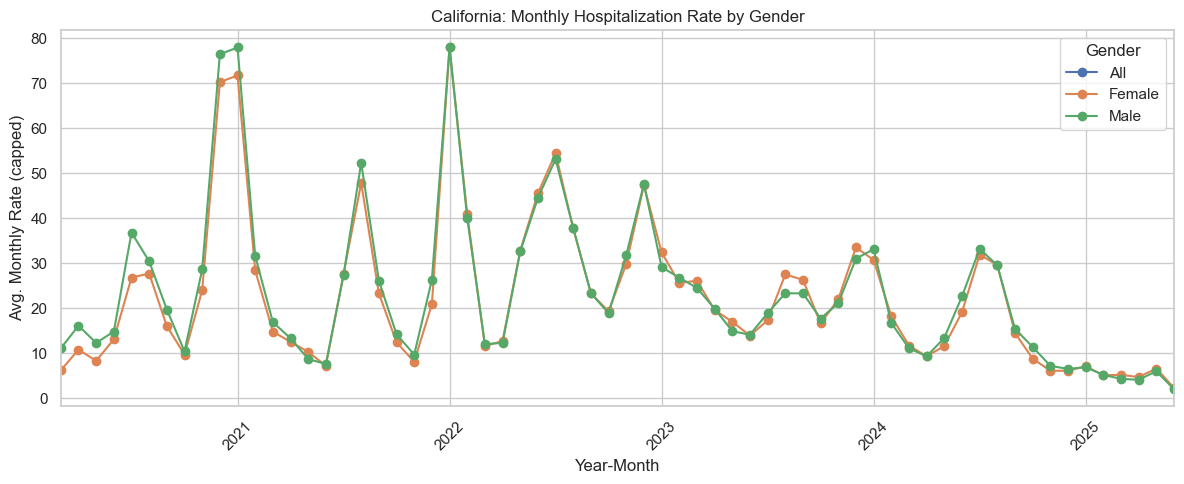

In [183]:
# 1. Filter: gender subgroups, other demos = All, state = California
df_sub = df[
    (df['gender'].isin(['Male','Female'])) &
    (df['agecategory'] == 'All') &
    (df['race']        == 'All') &
    (df['state']       == 'California')
]

# 2. Pivot: index=yearmonth, columns=gender
pivot_ca_gender = (
    df_sub
    .groupby(['yearmonth','gender'])['monthlyrate_capped']
    .mean()
    .unstack('gender')
)

# 3. Plot
pivot_ca_gender.plot(figsize=(12,5), marker='o', markersize=6)
plt.title("California: Monthly Hospitalization Rate by Gender")
plt.xlabel("Year-Month")
plt.ylabel("Avg. Monthly Rate (capped)")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


Available races: ['A/PI, non-Hispanic', 'AI/AN, non-Hispanic', 'All', 'Black, non-Hispanic', 'Hispanic', 'White, non-Hispanic']


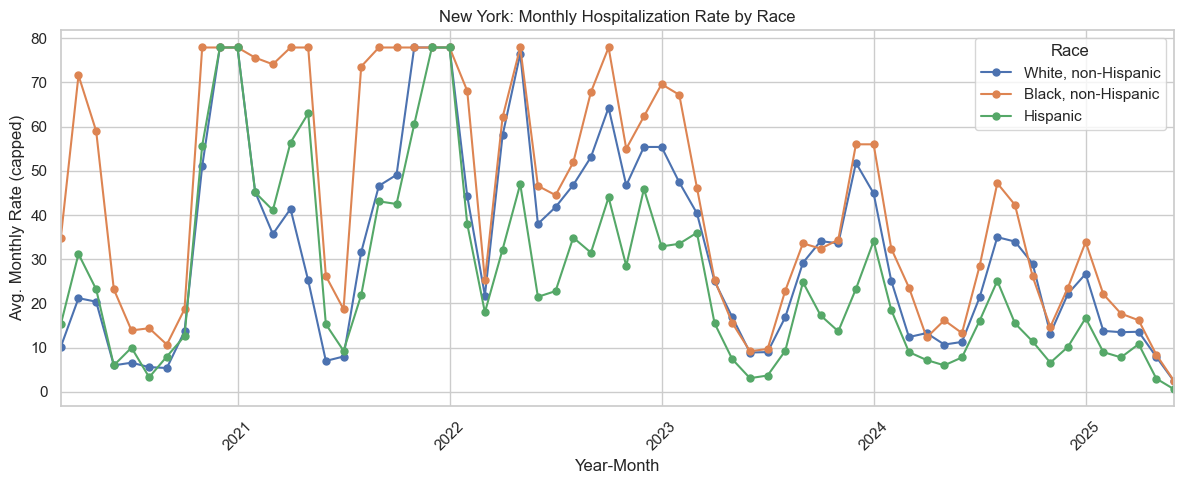

In [186]:
#2.How do monthly hospitalization rates vary across major racial groups in New York over time?

# Check available races in pivot
available_races = pivot_ny_race.columns.tolist()
print("Available races:", available_races)

# Plot only if race exists
races_to_plot = ['White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic']
races_to_plot = [r for r in races_to_plot if r in available_races]

for col in races_to_plot:
    pivot_ny_race[col].plot(label=col, figsize=(12,5), marker='o', markersize=5)
    
plt.title("New York: Monthly Hospitalization Rate by Race")
plt.xlabel("Year-Month")
plt.ylabel("Avg. Monthly Rate (capped)")
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.grid(True)
plt.tight_layout()
plt.show()

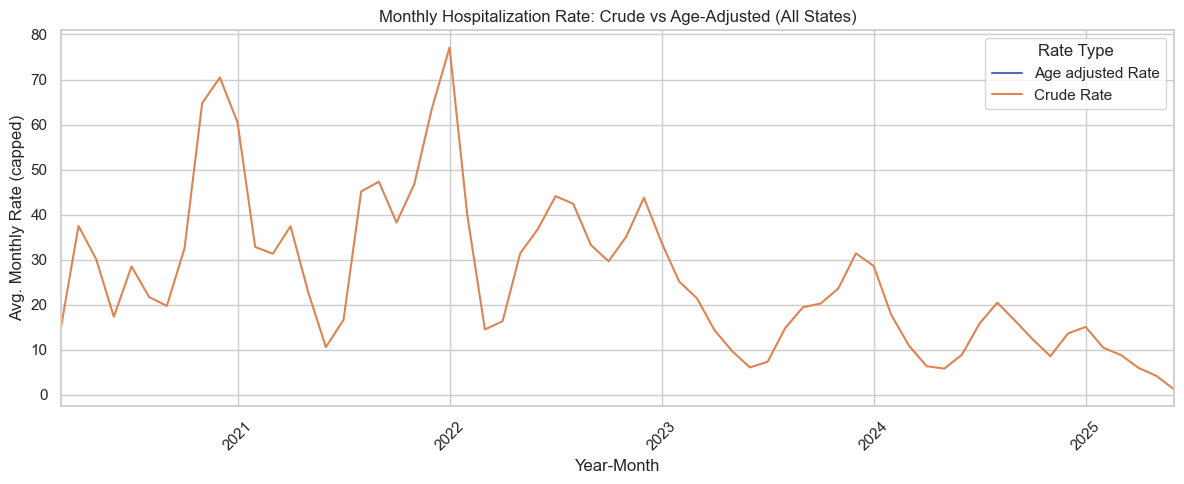

In [188]:
# 3.How do crude and age-adjusted monthly hospitalization rates compare over time across all states?

# 1. Filter: keep only Crude & Age-adjusted, demos = All
df_sub = df[
    (df['ratetype'].isin(['Crude Rate','Age adjusted Rate'])) &
    (df['gender'] == 'All') &
    (df['race']   == 'All') &
    (df['agecategory']=='All') &
    (df['state']  != 'COVID-NET')
]

# 2. Pivot: index=yearmonth, columns=ratetype, aggregated across all states
pivot_rt = (
    df_sub
    .groupby(['yearmonth','ratetype'])['monthlyrate_capped']
    .mean()
    .unstack('ratetype')
)

# 3. Plot
pivot_rt.plot(figsize=(12,5))
plt.title("Monthly Hospitalization Rate: Crude vs Age-Adjusted (All States)")
plt.xlabel("Year-Month")
plt.ylabel("Avg. Monthly Rate (capped)")
plt.xticks(rotation=45)
plt.legend(title='Rate Type')
plt.tight_layout()
plt.show()
